In [57]:
#!git clone https://github.com/johnowhitaker/tglcourse.git

In [1]:
import IPython.display as ipd
import torch
import torchvision
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image

In [2]:
!wget https://raw.githubusercontent.com/johnowhitaker/tglcourse/main/images/frog.png

--2023-11-20 04:31:40--  https://raw.githubusercontent.com/johnowhitaker/tglcourse/main/images/frog.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 321708 (314K) [image/png]
Saving to: ‘frog.png’

frog.png            100%[===================>] 314.17K  --.-KB/s    in 0.03s   

2023-11-20 04:31:40 (8.87 MB/s) - ‘frog.png’ saved [321708/321708]



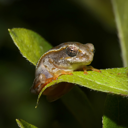

In [3]:
#im = Image.open('/content/frog.png').resize((128, 128))
im = Image.open('/content/frog.png').convert('RGB').resize((128, 128))
im

In [4]:
np.array(im).shape

(128, 128, 3)

In [5]:
def load_image_pil(fn,size=None):
  im = Image.open(fn).convert('RGB')
  if size !=None:
    im = im.resize(size)
  return im

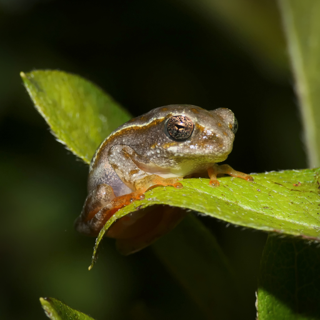

In [7]:
load_image_pil('/content/frog.png',size=(320,320))

In [8]:
import requests
from io import BytesIO

def pil_from_url(url,size):
  response = requests.get(url)
  im = Image.open(BytesIO(response.content)).convert('RGB')
  if size !=None:
    im = im.resize(size)
  return im

In [16]:
def pil_to_tensor(im):
    im = np.array(im) # To numpy array
    im = torch.tensor(im) # To tensor
    im = im.permute(2, 0, 1) # Rearrange dimensions
    im = im.unsqueeze(0) # Add batch dimension first
    return im/255.0 # Scale down to (0, 1)

def tensor_to_pil(tensor_im):
    tensor_im = tensor_im.squeeze() # In case there is a batch dimension
    tensor_im = tensor_im.detach().cpu() # Detach from computational graph - explained in next lesson!
    tensor_im = tensor_im.permute(1, 2, 0) # Rearrange the channels
    tensor_im = tensor_im.clip(0, 1)*255 # Note that we clip to (0, 1) before scaling to (0, 255)
    im_array = np.array(tensor_im).astype(np.uint8) # Convert to int as required by PIL
    im = Image.fromarray(im_array) # Convert to PIL image
    return im

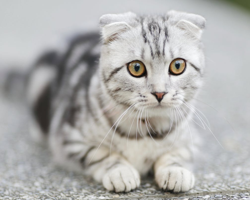

In [9]:
pil_from_url("https://images.pexels.com/photos/156934/pexels-photo-156934.jpeg?auto=compress&cs=tinysrgb&w=1260&h=750&dpr=1", size=(250, 200))

In [10]:
im = load_image_pil('/content/frog.png',size=(32,32))
image_array = np.array(im)

In [11]:
image_array.shape

(32, 32, 3)

In [12]:
torch_im = torch.tensor(np.array(im)).permute(2,0,1)/255.

In [13]:
torch_im.shape

torch.Size([3, 32, 32])

In [14]:
torch_im.min(),torch_im.max()

(tensor(0.), tensor(0.7804))

In [15]:
#from torchvision.transforms.transforms import ToTensor
to_tensor_transform = torchvision.transforms.ToTensor()
to_tensor_transform(im).shape

torch.Size([3, 32, 32])

In [17]:
import glob

In [19]:
!ls /content/tglcourse/images/

 ae_diagram.png							        course_flow.png
 An_oil_painting_of_a_cute_baby_robot_playing_with_toy_blocks.png       frog.png
 An_oil_painting_of_a_grid_of_tiny_robot_faces_in_rows.png	        gradio_demo_output.png
 An_oil_painting_of_a_robot_skiing_down_a_curved_slope.png	        lai_eg.jpg
 An_oil_painting_of_robots_in_a_neural_network.png		        lai_video.jpg
'a painting of a robot artist standing in a generative landscape.png'   ml_ingredients.png
 A_robot_holding_a_map__oil_on_canvas__robot_navigating.png	        text_encoder_noborder.png
 A_robot_passes_the_baton_to_another_robot__oil_on_canvas.png	        volcano_sketch.jpeg


In [20]:
image_files = glob.glob('/content/tglcourse/images/*')
image_files

['/content/tglcourse/images/ml_ingredients.png',
 '/content/tglcourse/images/An_oil_painting_of_robots_in_a_neural_network.png',
 '/content/tglcourse/images/a painting of a robot artist standing in a generative landscape.png',
 '/content/tglcourse/images/ae_diagram.png',
 '/content/tglcourse/images/frog.png',
 '/content/tglcourse/images/An_oil_painting_of_a_grid_of_tiny_robot_faces_in_rows.png',
 '/content/tglcourse/images/gradio_demo_output.png',
 '/content/tglcourse/images/lai_video.jpg',
 '/content/tglcourse/images/course_flow.png',
 '/content/tglcourse/images/A_robot_passes_the_baton_to_another_robot__oil_on_canvas.png',
 '/content/tglcourse/images/An_oil_painting_of_a_cute_baby_robot_playing_with_toy_blocks.png',
 '/content/tglcourse/images/A_robot_holding_a_map__oil_on_canvas__robot_navigating.png',
 '/content/tglcourse/images/volcano_sketch.jpeg',
 '/content/tglcourse/images/text_encoder_noborder.png',
 '/content/tglcourse/images/lai_eg.jpg',
 '/content/tglcourse/images/An_oil_p

In [21]:
images = [ load_image_pil(fn,size=(256,256)) for fn in image_files]
tims = [pil_to_tensor(im) for im in images]
tims[2].shape

torch.Size([1, 3, 256, 256])

In [22]:
all_images = torch.cat(tims,dim=0)
all_images.shape

torch.Size([16, 3, 256, 256])

In [23]:
m = all_images.mean(dim=0)
m.shape

torch.Size([3, 256, 256])

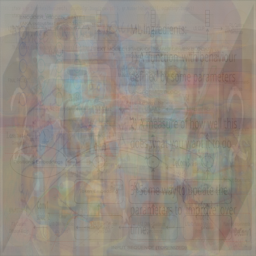

In [33]:
tensor_to_pil(m)

In [53]:
dist = (abs(all_images - m.view(-1,*all_images.shape[1:])))
dist.shape

torch.Size([16, 3, 256, 256])

In [54]:
tmaxdist=dist.mean(dim=0)

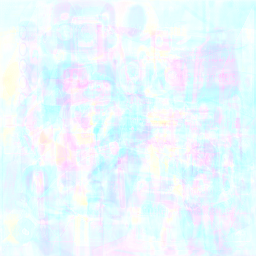

In [55]:
tensor_to_pil((tmaxdist/tmaxdist.mean(dim=0)))